## Bonertz, Brian, DSC550, Term Project

### Milestone 1

#### Narrative describing idea

The United States is a global leader in food safety and innovation. Bringing food from the farm to the fork in a safe and efficient way underlies the core values of the food industry. There are countless interventions, processing aids, and critical control points developed and continuing to be developed to ensure the product delivered to the consumer remains nutritious and wholesome to the point of consumption.  Although I would like to target my term project on a small segment of the food industry, I believe this type of analysis would be useful for many other applications. 

I have spent twenty years in the pork industry with focused education and experience in food safety. Understanding food borne illness demands primary attention, the study of total micro load on meat allows our industry an opportunity to examine processes that influence all micro growth rather than spending efforts on one organism. If we are able to keep all micro activity to a minimal, then we reduce risk with the organisms that cause food borne illness and food spoilage. 

Therefore, the data I have collected is shelf-life data of pork products throughout the past year. With this data, we can evaluate the total micro load of different cuts of pork and different stages of refrigeration. This allows us to assess the initial load of micro-organisms and the generation rate throughout chilling, and from this information, we can determine the age at which the product begins to become undesirable.  

The dataset I have collected includes the product age, the product type and cut, the total micro load, and organoleptic or sensory evaluation of packaging condition, purge, odor, color, texture, and overall product condition. 

The problem I would like to address and target: Can we predict the growth rate of the micro-organisms using the data provided, and can we find both the age and micro load at which the product gets to a spoiled or unacceptable condition.

In [1]:
#Import libraries
import numpy as np
import pandas as pd

In [2]:
shelflife = pd.read_csv('Shelf_life_data.csv')
shelflife.head()

,RecordNumber,Date,Time,Location,Type,Product,Production_Date,Sample_Date,Age,TPC_Value,Packaging_Condition,Purge,Odor,Color,Surface,Product_Condition,RowNum
0,97351383,12/30/2023,13:55,Plant A,Boneless,Tenderloin,11/15/2023,12/26/2023,41,3.20,Acceptable,Large,Sour,Pale,Slimy,Not Acceptable,1
1,97351369,12/30/2023,13:54,Plant A,Bone-In,Loin,11/15/2023,12/26/2023,41,6.72,Leaker,Large,Sour,Pale,Slimy,Not Acceptable,2
2,97351346,12/30/2023,13:53,Plant A,Boneless,Butt,11/15/2023,12/26/2023,41,7.36,Leaker,Moderate,Sour,Pale,Slimy,Not Acceptable,3
3,97351323,12/30/2023,13:53,Plant A,Boneless,Loin,11/15/2023,12/26/2023,41,6.61,Leaker,Large,Sour,Pale,Slimy,Not Acceptable,4
4,97268109,12/29/2023,14:54,Plant B,Boneless,Butt,11/16/2023,12/26/2023,40,3.43,Acceptable,Moderate,Off Condition,Good,Slimy,Not Acceptable,5


#### Graphical analysis creating a min of 4 graphs

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#Graph to show the mean and standard devition TPC_Value of each product_condition

prod_condition = shelflife.groupby("Product_Condition").agg([np.mean, np.std])

sl_tpc = prod_condition['TPC_Value']
sl_tpc.head

C:\Users\bonertzb\AppData\Local\Temp\ipykernel_20236\2644026343.py:3: FutureWarning: ['Date', 'Time', 'Location', 'Type', 'Product', 'Production_Date', 'Sample_Date', 'Packaging_Condition', 'Purge', 'Odor', 'Color', 'Surface'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  prod_condition = shelflife.groupby("Product_Condition").agg([np.mean, np.std])


<bound method NDFrame.head of                        mean       std
Product_Condition                    
Acceptable         3.650757  1.963072
Not Acceptable     6.027234  1.772625>

<Axes: title={'center': 'Average TPC Value of Product Condition'}, ylabel='Product_Condition'>

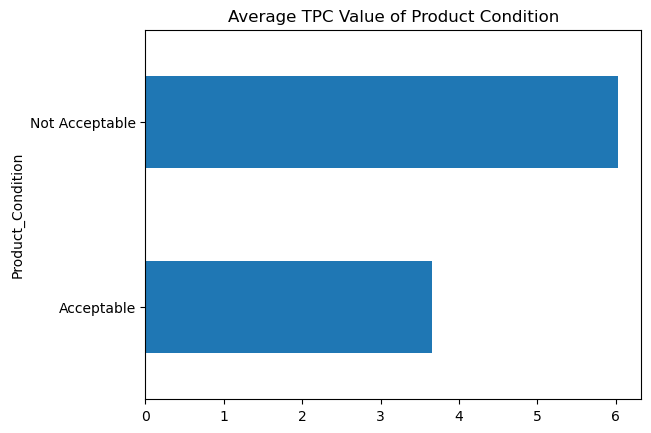

In [5]:
#Graph showing the difference in the mean TPC value by product condition

sl_tpc.plot(kind = "barh", y = "mean", legend = False,
            title = "Average TPC Value of Product Condition")

The average acceptable TPC value is 3.65 and the average unacceptable TPC value is 6.02. This gives us a rough idea of the TPC value that would result in acceptable or unacceptable producg condition. 

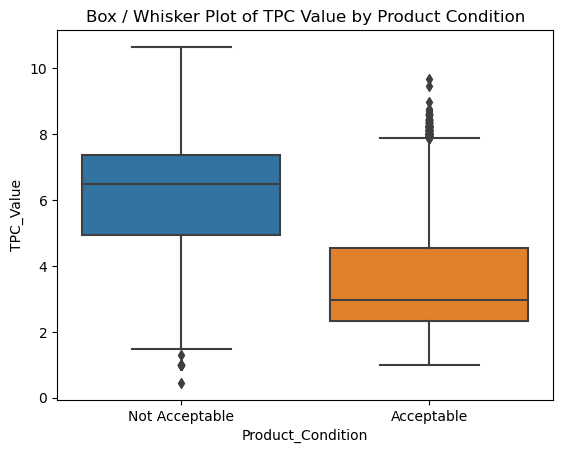

In [6]:
#Better analysis would be to use a box whisker to see the data distribution of the acceptable and 
#unacceptable product condition

sns.boxplot(data=shelflife, x='Product_Condition', y='TPC_Value')
plt.title("Box / Whisker Plot of TPC Value by Product Condition")
plt.show()

Even thought he StD of TPC Values in the "Not Acceptable" (1.77) variable is smaller than the "Acceptable" (1.96) vairable, from the box and whisker chart we can see that there is still quite range in the "Not Acceptable" variable. 

From this chart we can visually see that the "Acceptable" value is below 5 TPC and we start to creep into the "Not Acceptable" above 5 TPC. 

Text(0.5, 0.98, 'TPC Value by Age and Product Condition')

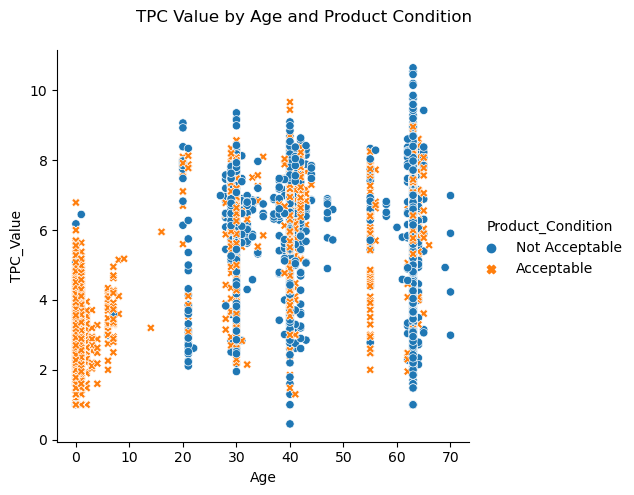

In [7]:
#create a scatter chart of TPC Values with product condition

sl = sns.relplot(data=shelflife, x="Age", y="TPC_Value", hue="Product_Condition", style="Product_Condition")
sl.fig.subplots_adjust(top=0.9)
sl.fig.suptitle('TPC Value by Age and Product Condition')

This scatter chart shows the product condition at different stages of age and TPC. We can see that below 20 days, there is a very small amount of "Not Acceptable" product, and TPC values seem to be under 7 TPC. We start to get a bigger range in TPC values and mixure of acceptable and unacceptable product condition at the 20 day mark. 

Text(0.5, 0.98, 'Comparison of Product Type')

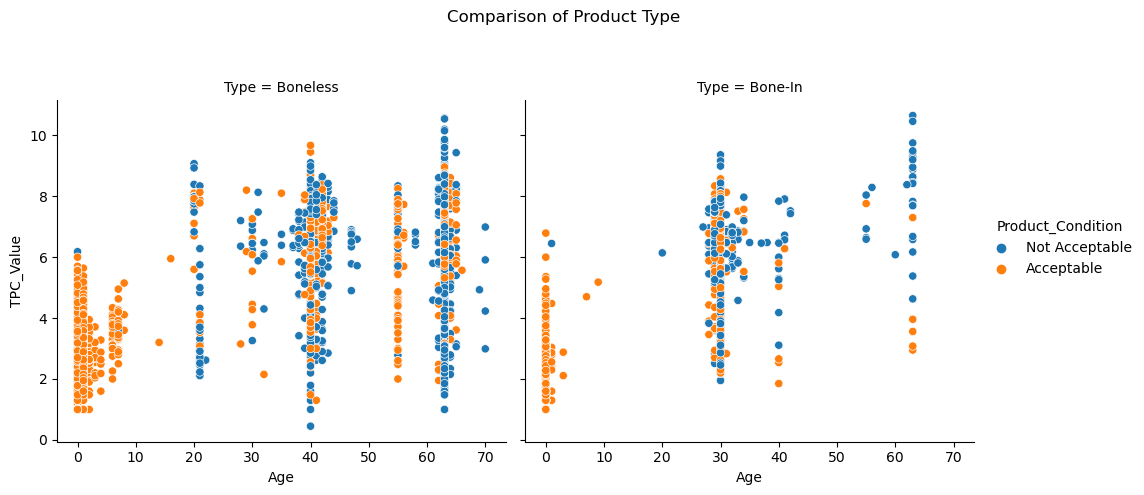

In [8]:
#Comparison of bone in product vs boneless product by product condition

sl_comp1 = sns.relplot(data=shelflife, x="Age", y="TPC_Value", hue="Product_Condition", col="Type")
sl_comp1.fig.subplots_adjust(top=0.8)
sl_comp1.fig.suptitle('Comparison of Product Type')

Here I wanted to compare the product condition with different types of product "Bone In vs Boneless" product. Not sure if this tells us much in the difference between the types. We seem to have more data in the Boneless type then the Bone in. Both types still seem to have most success with "Acceptable" product under 20 days.

Text(0.5, 0.98, 'Comparison of Product Type')

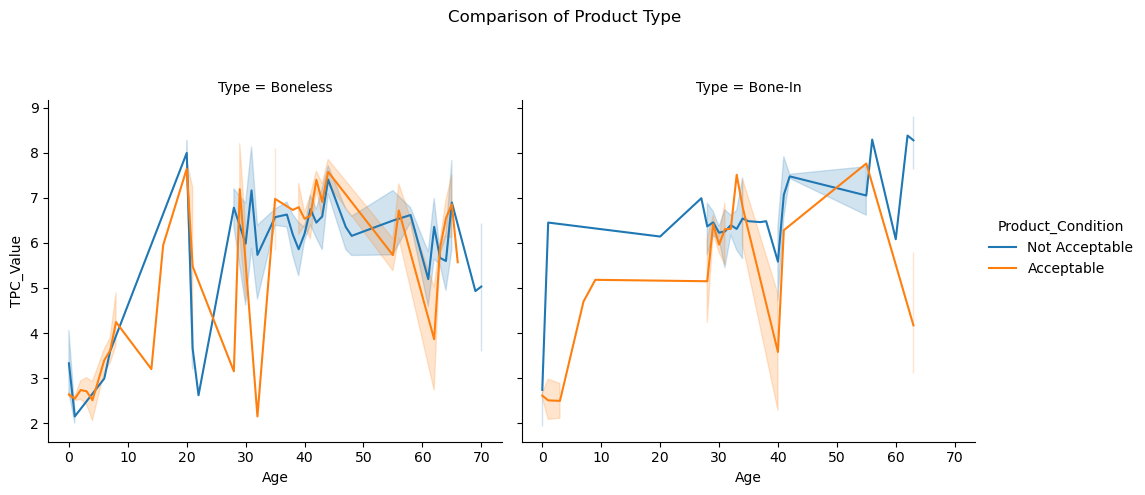

In [9]:
#Comparison of bone in vs boneless product using a line chart

sl_comp2 = sns.relplot(data=shelflife, x="Age", y="TPC_Value", kind="line", hue="Product_Condition", col="Type")
sl_comp2.fig.subplots_adjust(top=0.8)
sl_comp2.fig.suptitle('Comparison of Product Type')

This is another comparison chart using a line with confidence interval. There are some things to pick up here. Bone In for example does show more acceptable at lower TPC Values at days 30 - 40 than the Not Acceptable Product. For boneless, this is similar in the 50 to 60 range with some overlap. 

Text(0.5, 0.98, 'Comparison of Packaging Type')

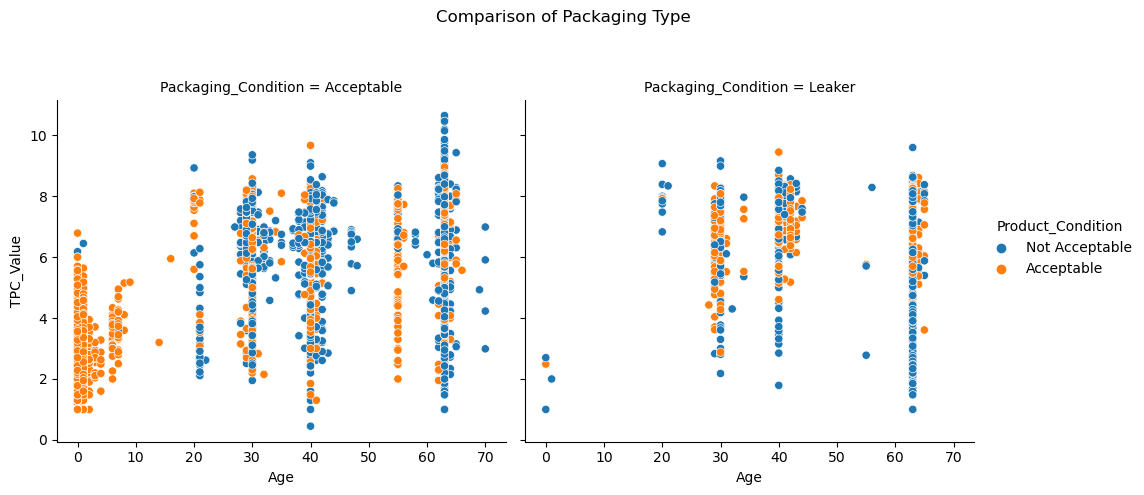

In [10]:
#Evaluating the differnce in package condition in relation to product condition

sl_comp3 = sns.relplot(data=shelflife, x="Age", y="TPC_Value", hue="Product_Condition", col="Packaging_Condition")
sl_comp3.fig.subplots_adjust(top=0.8)
sl_comp3.fig.suptitle('Comparison of Packaging Type')

Finally, i wanted to see how packaging condition played in the overall product condition. We need to keep in mind that at day zero packaging is more likely to be good as it is taken right off the line and to the lab. The more the package is handled the more likely it is to become damaged. In the comparison above, there doesn't seem to be much correlation between packages that appear to be leaking vs packages that are acceptable. 

There is more data in the acceptable package condition than that of leaker, but i think we need to look deeper into this data to see how it correlates. 

#### Overview / next steps

Not sure if we can clearly state that we have the answers to the questions. Using linear regression and logisit regression will give us a better understanding of TPC Value, Age, and Product Codition. 

I would like to explore some of the other variables to see how they play into the TPC Values in junction with Age. I would like to look at Purge, Odor, Color, Surface, in a confusion matrix to see how closely they relate to product condition and then examine the best fit with TPV Value and Age. Then examine regression again. 

### Milestone 2

I want to clarify my project or target statement and i might be biting off more than i can chew, but Product Condition has 2 variables. Either it is Acceptable or Not Acceptable. I want to find the TPC value and Age at which the product goes from Acceptable to Not Acceptable. This will be assessed on two products. One Bone in Product type (backribs) and one Boneless product type (boneless loins). These are selected because they are more sought after and valuable then other primal types and come with higher demand. Therefore, establishing conclusion on these two products would supplement value in exploring other products at a later time. 

Further, I would like to explore if there are differences in the shelf life of these two products between the plants. This would help understand or establish best operation or sanitation practice between the facilities.   

In [11]:
#FIrst we will explore the data to ensure there are no null values. 
# Search dataset for null values

shelflife.isnull().sum()

RecordNumber           0
Date                   0
Time                   0
Location               0
Type                   0
Product                0
Production_Date        0
Sample_Date            0
Age                    0
TPC_Value              0
Packaging_Condition    0
Purge                  0
Odor                   0
Color                  0
Surface                0
Product_Condition      0
RowNum                 0
dtype: int64

There doesn't seem to be any data missing, so the dataset is solid, however, there are several columns that are not necessary. Recordnumber and RowNum are unique identifiers for the data entry, but doesn't have anything to do with the data we are examining. Also, Date and Time are irrelevent as they record the date and time the record was generated. Production date and sample date is the difference in the sample age. Since we already have the "Age" column, these date columns are not relevent. Therefore, we can drop these columns.

In [12]:
shelflife_cl = shelflife.drop(['RecordNumber', 'Date', 'Time', 'Production_Date', 'Sample_Date', 'RowNum'], axis=1)
shelflife_cl.head()

,Location,Type,Product,Age,TPC_Value,Packaging_Condition,Purge,Odor,Color,Surface,Product_Condition
0,Plant A,Boneless,Tenderloin,41,3.20,Acceptable,Large,Sour,Pale,Slimy,Not Acceptable
1,Plant A,Bone-In,Loin,41,6.72,Leaker,Large,Sour,Pale,Slimy,Not Acceptable
2,Plant A,Boneless,Butt,41,7.36,Leaker,Moderate,Sour,Pale,Slimy,Not Acceptable
3,Plant A,Boneless,Loin,41,6.61,Leaker,Large,Sour,Pale,Slimy,Not Acceptable
4,Plant B,Boneless,Butt,40,3.43,Acceptable,Moderate,Off Condition,Good,Slimy,Not Acceptable


In [13]:
#I want to replace the Product Condition values to a shorter value than acceptable and not acceptable and clearly define the 
#condition
#str.replace('.',',')
shelflife_cl['Product_Condition'] = shelflife_cl['Product_Condition'].str.replace('Not Acceptable', 'Bad')
shelflife_cl['Product_Condition'] = shelflife_cl['Product_Condition'].str.replace('Acceptable', 'Good')
shelflife_cl.head()

,Location,Type,Product,Age,TPC_Value,Packaging_Condition,Purge,Odor,Color,Surface,Product_Condition
0,Plant A,Boneless,Tenderloin,41,3.20,Acceptable,Large,Sour,Pale,Slimy,Bad
1,Plant A,Bone-In,Loin,41,6.72,Leaker,Large,Sour,Pale,Slimy,Bad
2,Plant A,Boneless,Butt,41,7.36,Leaker,Moderate,Sour,Pale,Slimy,Bad
3,Plant A,Boneless,Loin,41,6.61,Leaker,Large,Sour,Pale,Slimy,Bad
4,Plant B,Boneless,Butt,40,3.43,Acceptable,Moderate,Off Condition,Good,Slimy,Bad


In [14]:
#Next i want to concatenate the type column and product column so i can filter out my products. 
#the product "Loin" is listed as both a Bone In and Boneless type, so i need to join them together and filter out the Bone In
#loin product

shelflife_cl['Product_Type'] = shelflife_cl['Type'].map(str) + ' ' + shelflife_cl['Product'].map(str)
shelflife_cl.head()

,Location,Type,Product,Age,TPC_Value,Packaging_Condition,Purge,Odor,Color,Surface,Product_Condition,Product_Type
0,Plant A,Boneless,Tenderloin,41,3.20,Acceptable,Large,Sour,Pale,Slimy,Bad,Boneless Tenderloin
1,Plant A,Bone-In,Loin,41,6.72,Leaker,Large,Sour,Pale,Slimy,Bad,Bone-In Loin
2,Plant A,Boneless,Butt,41,7.36,Leaker,Moderate,Sour,Pale,Slimy,Bad,Boneless Butt
3,Plant A,Boneless,Loin,41,6.61,Leaker,Large,Sour,Pale,Slimy,Bad,Boneless Loin
4,Plant B,Boneless,Butt,40,3.43,Acceptable,Moderate,Off Condition,Good,Slimy,Bad,Boneless Butt


In [15]:
#Next i will filter the rows keeping only the product type "Bone-In Backrib", and "Boneless Loin"

product_to_keep = ['Bone-In Back Rib', 'Boneless Loin']

new_df = shelflife_cl[shelflife_cl['Product_Type'].isin(product_to_keep)]

new_df.head(10)

,Location,Type,Product,Age,TPC_Value,Packaging_Condition,Purge,Odor,Color,Surface,Product_Condition,Product_Type
3,Plant A,Boneless,Loin,41,6.61,Leaker,Large,Sour,Pale,Slimy,Bad,Boneless Loin
6,Plant B,Boneless,Loin,40,3.97,Acceptable,Moderate,Off Condition,Pale,Good,Bad,Boneless Loin
7,Plant B,Bone-In,Back Rib,0,2.92,Acceptable,None,Good,Pale,Good,Good,Bone-In Back Rib
8,Plant B,Bone-In,Back Rib,30,4.15,Acceptable,None,Off Condition,Good,Good,Bad,Bone-In Back Rib
9,Plant B,Boneless,Loin,0,2.99,Acceptable,None,Good,Good,Good,Good,Boneless Loin
13,Plant B,Bone-In,Back Rib,0,2.20,Acceptable,None,Good,Good,Good,Good,Bone-In Back Rib
14,Plant B,Boneless,Loin,40,3.94,Acceptable,Moderate,Off Condition,Pale,Slimy,Bad,Boneless Loin
15,Plant B,Boneless,Loin,63,7.54,Acceptable,Large,Off Condition,Pale,Slimy,Bad,Boneless Loin
16,Plant B,Boneless,Loin,42,3.88,Acceptable,Small,Off Condition,Pale,Slimy,Bad,Boneless Loin
17,Plant B,Boneless,Loin,21,2.62,Acceptable,Moderate,Off Condition,Pale,Slimy,Bad,Boneless Loin


In [16]:
#I want to separate out odor, color, and surface to see how they correlate with product condition
#The product condition is determined through sensory evaluation of Odor, Surface Condition, and Color
#The expected outcome is that good odor, color, and surface would result in good product condition.

sensory_df = new_df.drop(['Location', 'Type', 'Product', 'Age', 'TPC_Value', 'Packaging_Condition', 'Purge', 'Product_Type'], axis=1)
sensory_df.head()

,Odor,Color,Surface,Product_Condition
3,Sour,Pale,Slimy,Bad
6,Off Condition,Pale,Good,Bad
7,Good,Pale,Good,Good
8,Off Condition,Good,Good,Bad
9,Good,Good,Good,Good


In [17]:
#We will then convert the categorical values to dummy variables

sensory_df1 = pd.get_dummies(sensory_df)
print(sensory_df1.shape)
sensory_df1.head()

(2259, 16)


,Odor_Good,Odor_Off Condition,Odor_Putrid,Odor_Rotten Egg,Odor_Sour,Color_Brown,Color_Good,Color_Green,Color_Pale,Color_Red / Brown,Surface_Dry,Surface_Good,Surface_Slimy,Surface_Tacky,Product_Condition_Bad,Product_Condition_Good
3,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0
6,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0
7,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1
8,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0
9,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1


<Axes: >

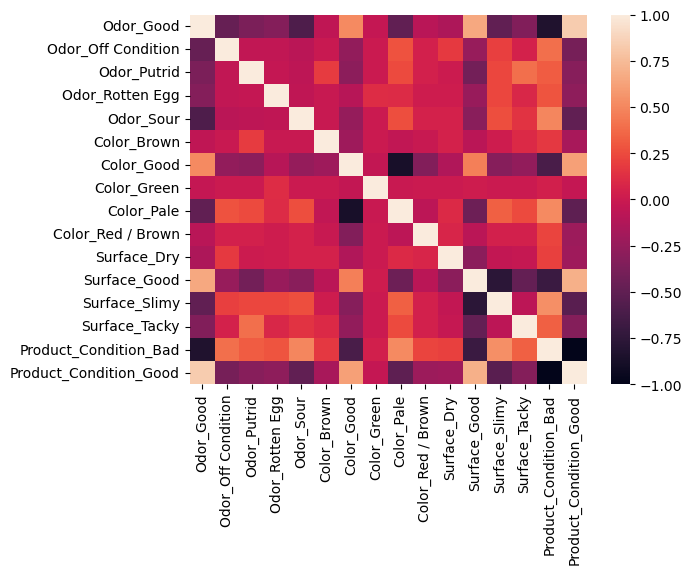

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.heatmap(sensory_df1.corr())

In [19]:
shelf_corr = sensory_df1.corr()
shelf_corr.round(2)

,Odor_Good,Odor_Off Condition,Odor_Putrid,Odor_Rotten Egg,Odor_Sour,Color_Brown,Color_Good,Color_Green,Color_Pale,Color_Red / Brown,Surface_Dry,Surface_Good,Surface_Slimy,Surface_Tacky,Product_Condition_Bad,Product_Condition_Good
Odor_Good,1.00,-0.47,-0.37,-0.33,-0.59,-0.06,0.51,-0.04,-0.50,-0.09,-0.14,0.65,-0.50,-0.35,-0.83,0.83
Odor_Off Condition,-0.47,1.00,-0.05,-0.05,-0.08,-0.01,-0.27,-0.01,0.28,0.04,0.17,-0.25,0.20,0.05,0.39,-0.39
Odor_Putrid,-0.37,-0.05,1.00,-0.04,-0.07,0.18,-0.29,-0.00,0.25,0.05,0.01,-0.41,0.23,0.39,0.31,-0.31
Odor_Rotten Egg,-0.33,-0.05,-0.04,1.00,-0.06,-0.02,-0.10,0.12,0.10,0.01,0.01,-0.24,0.23,0.08,0.28,-0.28
Odor_Sour,-0.59,-0.08,-0.07,-0.06,1.00,-0.02,-0.25,-0.01,0.26,0.05,0.05,-0.31,0.26,0.14,0.49,-0.49
Color_Brown,-0.06,-0.01,0.18,-0.02,-0.02,1.00,-0.22,-0.00,-0.05,-0.02,0.05,-0.08,0.02,0.10,0.17,-0.17
Color_Good,0.51,-0.27,-0.29,-0.10,-0.25,-0.22,1.00,-0.04,-0.87,-0.34,-0.13,0.46,-0.33,-0.27,-0.61,0.61
Color_Green,-0.04,-0.01,-0.00,0.12,-0.01,-0.00,-0.04,1.00,-0.01,-0.00,-0.00,0.01,-0.01,-0.00,0.03,-0.03
Color_Pale,-0.50,0.28,0.25,0.10,0.26,-0.05,-0.87,-0.01,1.00,-0.08,0.10,-0.44,0.33,0.24,0.51,-0.51
Color_Red / Brown,-0.09,0.04,0.05,0.01,0.05,-0.02,-0.34,-0.00,-0.08,1.00,0.08,-0.09,0.04,0.04,0.22,-0.22


The features Odor, Color, and Surface are part of organoleptic or sensory assessment of the product and help the data collector to determine Product Condition. Above shows that good Odor, Color, and Surface has a close correlation to acceptable product condition. Because our target question is to determine at what age and TPC value combination can predict Acceptable or Unacceptable product condition, the features of Odor, Color, and Surface are not relevent and we can drop these columns.

Furthermore, because we have combined the "Type" and "Product" columns into one, we can remove those two columns

In [20]:
new_df1 = new_df.drop(['Color', 'Odor', 'Surface', 'Type', 'Product'], axis=1)
new_df1.head()

,Location,Age,TPC_Value,Packaging_Condition,Purge,Product_Condition,Product_Type
3,Plant A,41,6.61,Leaker,Large,Bad,Boneless Loin
6,Plant B,40,3.97,Acceptable,Moderate,Bad,Boneless Loin
7,Plant B,0,2.92,Acceptable,None,Good,Bone-In Back Rib
8,Plant B,30,4.15,Acceptable,None,Bad,Bone-In Back Rib
9,Plant B,0,2.99,Acceptable,None,Good,Boneless Loin


In [21]:
#next i want to replace the "Location" fields with variables. 

new_df1['Location'] = new_df1['Location'].apply({'Plant A':1, 'Plant B':2, 'Plant C':3, 'Plant D':4, 'Plant E':5, 'Plant F':6}.get)
new_df1.head()

,Location,Age,TPC_Value,Packaging_Condition,Purge,Product_Condition,Product_Type
3,1,41,6.61,Leaker,Large,Bad,Boneless Loin
6,2,40,3.97,Acceptable,Moderate,Bad,Boneless Loin
7,2,0,2.92,Acceptable,None,Good,Bone-In Back Rib
8,2,30,4.15,Acceptable,None,Bad,Bone-In Back Rib
9,2,0,2.99,Acceptable,None,Good,Boneless Loin


In [22]:
#Next we will break this dataset into two different dataframes. One for Backribs and one for 
#boneless loins

bone_df = new_df1[(new_df1['Product_Type'] == 'Bone-In Back Rib')]
boneless_df = new_df1[(new_df1['Product_Type'] == 'Boneless Loin')]
print(bone_df.shape)
print(bone_df.head())
print(boneless_df.shape)
print(boneless_df.head())

(603, 7)
    Location  Age  TPC_Value Packaging_Condition Purge Product_Condition  \
7          2    0       2.92          Acceptable  None              Good   
8          2   30       4.15          Acceptable  None               Bad   
13         2    0       2.20          Acceptable  None              Good   
19         2    0       2.76          Acceptable  None              Good   
27         1    0       2.48          Acceptable  None              Good   

        Product_Type  
7   Bone-In Back Rib  
8   Bone-In Back Rib  
13  Bone-In Back Rib  
19  Bone-In Back Rib  
27  Bone-In Back Rib  
(1656, 7)
    Location  Age  TPC_Value Packaging_Condition     Purge Product_Condition  \
3          1   41       6.61              Leaker     Large               Bad   
6          2   40       3.97          Acceptable  Moderate               Bad   
9          2    0       2.99          Acceptable      None              Good   
14         2   40       3.94          Acceptable  Moderate        

In [23]:
#We will then convert the categorical values to dummy variables for the Bone dataframe

bonedummy_df = pd.get_dummies(bone_df)
print(bonedummy_df.shape)
bonedummy_df.head()

(603, 12)


,Location,Age,TPC_Value,Packaging_Condition_Acceptable,Packaging_Condition_Leaker,Purge_Large,Purge_Moderate,Purge_None,Purge_Small,Product_Condition_Bad,Product_Condition_Good,Product_Type_Bone-In Back Rib
7,2,0,2.92,1,0,0,0,1,0,0,1,1
8,2,30,4.15,1,0,0,0,1,0,1,0,1
13,2,0,2.20,1,0,0,0,1,0,0,1,1
19,2,0,2.76,1,0,0,0,1,0,0,1,1
27,1,0,2.48,1,0,0,0,1,0,0,1,1


<Axes: >

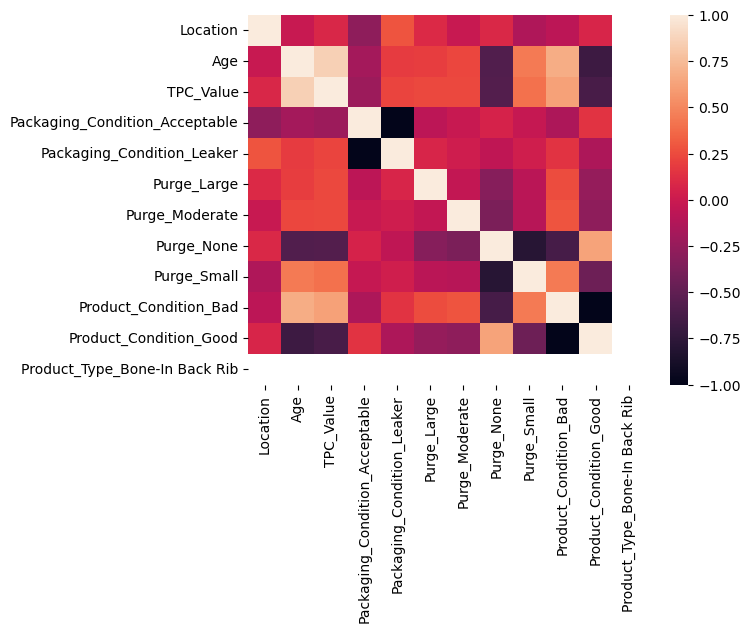

In [24]:
#Check correlation

sns.heatmap(bonedummy_df.corr())

In [25]:
shelf_corr = bonedummy_df.corr()
shelf_corr.round(2)

,Location,Age,TPC_Value,Packaging_Condition_Acceptable,Packaging_Condition_Leaker,Purge_Large,Purge_Moderate,Purge_None,Purge_Small,Product_Condition_Bad,Product_Condition_Good,Product_Type_Bone-In Back Rib
Location,1.00,-0.02,0.09,-0.29,0.29,0.10,-0.02,0.09,-0.14,-0.08,0.08,NaN
Age,-0.02,1.00,0.85,-0.19,0.19,0.19,0.23,-0.57,0.44,0.68,-0.68,NaN
TPC_Value,0.09,0.85,1.00,-0.22,0.22,0.24,0.24,-0.56,0.40,0.62,-0.62,NaN
Packaging_Condition_Acceptable,-0.29,-0.19,-0.22,1.00,-1.00,-0.08,-0.02,0.06,-0.03,-0.15,0.15,NaN
Packaging_Condition_Leaker,0.29,0.19,0.22,-1.00,1.00,0.08,0.02,-0.06,0.03,0.15,-0.15,NaN
Purge_Large,0.10,0.19,0.24,-0.08,0.08,1.00,-0.04,-0.33,-0.08,0.25,-0.25,NaN
Purge_Moderate,-0.02,0.23,0.24,-0.02,0.02,-0.04,1.00,-0.37,-0.10,0.28,-0.28,NaN
Purge_None,0.09,-0.57,-0.56,0.06,-0.06,-0.33,-0.37,1.00,-0.79,-0.63,0.63,NaN
Purge_Small,-0.14,0.44,0.40,-0.03,0.03,-0.08,-0.10,-0.79,1.00,0.44,-0.44,NaN
Product_Condition_Bad,-0.08,0.68,0.62,-0.15,0.15,0.25,0.28,-0.63,0.44,1.00,-1.00,NaN


In [26]:
#We will then convert the categorical values to dummy variables for the Boneless dataframe

bonelessdummy_df = pd.get_dummies(boneless_df)
print(bonelessdummy_df.shape)
bonelessdummy_df.head()

(1656, 12)


,Location,Age,TPC_Value,Packaging_Condition_Acceptable,Packaging_Condition_Leaker,Purge_Large,Purge_Moderate,Purge_None,Purge_Small,Product_Condition_Bad,Product_Condition_Good,Product_Type_Boneless Loin
3,1,41,6.61,0,1,1,0,0,0,1,0,1
6,2,40,3.97,1,0,0,1,0,0,1,0,1
9,2,0,2.99,1,0,0,0,1,0,0,1,1
14,2,40,3.94,1,0,0,1,0,0,1,0,1
15,2,63,7.54,1,0,1,0,0,0,1,0,1


<Axes: >

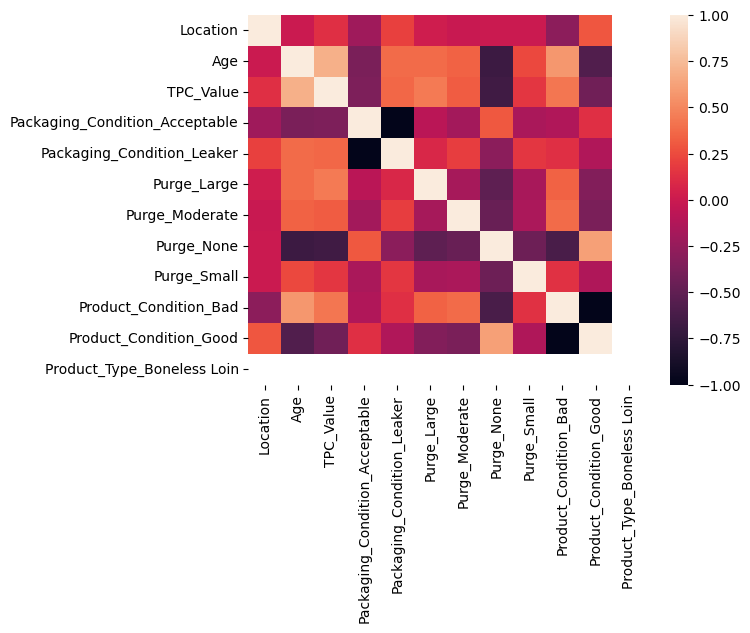

In [27]:
#Check correlation

sns.heatmap(bonelessdummy_df.corr())

In [28]:
shelf_corr = bonelessdummy_df.corr()
shelf_corr.round(2)

,Location,Age,TPC_Value,Packaging_Condition_Acceptable,Packaging_Condition_Leaker,Purge_Large,Purge_Moderate,Purge_None,Purge_Small,Product_Condition_Bad,Product_Condition_Good,Product_Type_Boneless Loin
Location,1.00,-0.00,0.13,-0.21,0.21,0.02,-0.01,-0.01,-0.00,-0.30,0.30,NaN
Age,-0.00,1.00,0.69,-0.38,0.38,0.38,0.34,-0.68,0.24,0.58,-0.58,NaN
TPC_Value,0.13,0.69,1.00,-0.36,0.36,0.44,0.31,-0.66,0.16,0.43,-0.43,NaN
Packaging_Condition_Acceptable,-0.21,-0.38,-0.36,1.00,-1.00,-0.08,-0.19,0.30,-0.16,-0.13,0.13,NaN
Packaging_Condition_Leaker,0.21,0.38,0.36,-1.00,1.00,0.08,0.19,-0.30,0.16,0.13,-0.13,NaN
Purge_Large,0.02,0.38,0.44,-0.08,0.08,1.00,-0.18,-0.51,-0.17,0.34,-0.34,NaN
Purge_Moderate,-0.01,0.34,0.31,-0.19,0.19,-0.18,1.00,-0.47,-0.15,0.38,-0.38,NaN
Purge_None,-0.01,-0.68,-0.66,0.30,-0.30,-0.51,-0.47,1.00,-0.44,-0.61,0.61,NaN
Purge_Small,-0.00,0.24,0.16,-0.16,0.16,-0.17,-0.15,-0.44,1.00,0.13,-0.13,NaN
Product_Condition_Bad,-0.30,0.58,0.43,-0.13,0.13,0.34,0.38,-0.61,0.13,1.00,-1.00,NaN


There seems to be a strong correlation between TPC Value and Age for both bone in and boneless dataframes. Also Age and TPC Value have a fairly strong correlation with Product Condition Bad for both dataframes and No purge and acceptable packaging condition correlate well with good product condition. 

Finally, we can rename our two dataframes and remove the Product_Type columns for each... They are just repeating values, so we will rename our dataframes to reflect these.

In [29]:
backrib_df = bonedummy_df.drop(['Product_Type_Bone-In Back Rib'], axis=1)
loin_df = bonelessdummy_df.drop(['Product_Type_Boneless Loin'], axis=1)

print(backrib_df.shape)
backrib_df.head()

(603, 11)


,Location,Age,TPC_Value,Packaging_Condition_Acceptable,Packaging_Condition_Leaker,Purge_Large,Purge_Moderate,Purge_None,Purge_Small,Product_Condition_Bad,Product_Condition_Good
7,2,0,2.92,1,0,0,0,1,0,0,1
8,2,30,4.15,1,0,0,0,1,0,1,0
13,2,0,2.20,1,0,0,0,1,0,0,1
19,2,0,2.76,1,0,0,0,1,0,0,1
27,1,0,2.48,1,0,0,0,1,0,0,1


In [30]:
print(loin_df.shape)
loin_df.head()

(1656, 11)


,Location,Age,TPC_Value,Packaging_Condition_Acceptable,Packaging_Condition_Leaker,Purge_Large,Purge_Moderate,Purge_None,Purge_Small,Product_Condition_Bad,Product_Condition_Good
3,1,41,6.61,0,1,1,0,0,0,1,0
6,2,40,3.97,1,0,0,1,0,0,1,0
9,2,0,2.99,1,0,0,0,1,0,0,1
14,2,40,3.94,1,0,0,1,0,0,1,0
15,2,63,7.54,1,0,1,0,0,0,1,0


### Milestone 3

#### First I will work with the boneless data in the "Loin" dataframe.

In [31]:
#step 1 will be to split the loin data frame into test and train data by 80 / 20
#and i wanted to remove the location column to see if i can zero in on the other attributes better
#in the decision tree

from sklearn.model_selection import train_test_split
loin_decision_tree = loin_df.drop(['Location', 'Product_Condition_Good'], axis=1)
loin_decision_tree.head()


,Age,TPC_Value,Packaging_Condition_Acceptable,Packaging_Condition_Leaker,Purge_Large,Purge_Moderate,Purge_None,Purge_Small,Product_Condition_Bad
3,41,6.61,0,1,1,0,0,0,1
6,40,3.97,1,0,0,1,0,0,1
9,0,2.99,1,0,0,0,1,0,0
14,40,3.94,1,0,0,1,0,0,1
15,63,7.54,1,0,1,0,0,0,1


In [32]:
X = loin_decision_tree.drop('Product_Condition_Bad',axis=1)
Y = loin_decision_tree[['Product_Condition_Bad']]
x_trainloindt, x_testloindt, y_trainloindt, y_testloindt = train_test_split(X, Y, test_size = 0.2)

x_trainloindt.shape, x_testloindt.shape, y_trainloindt.shape, y_testloindt.shape

((1324, 8), (332, 8), (1324, 1), (332, 1))

In [33]:
#step 2 - fit a decision tree classifier on the training set

from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(criterion='entropy', max_depth=3)
loin_dec_tree = clf.fit(x_trainloindt, y_trainloindt)

In [34]:
#step 3 - check accuracy score and confusion matrix for prediction and test

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, precision_score, recall_score, f1_score

y_val_predloindt = clf.predict(x_testloindt)

print("Accuracy Score of", accuracy_score(y_testloindt, y_val_predloindt))

#Confusion Matrix

cmloin = confusion_matrix(y_testloindt, y_val_predloindt)
cmloin

Accuracy Score of 0.8373493975903614


array([[215,  24],
       [ 30,  63]], dtype=int64)

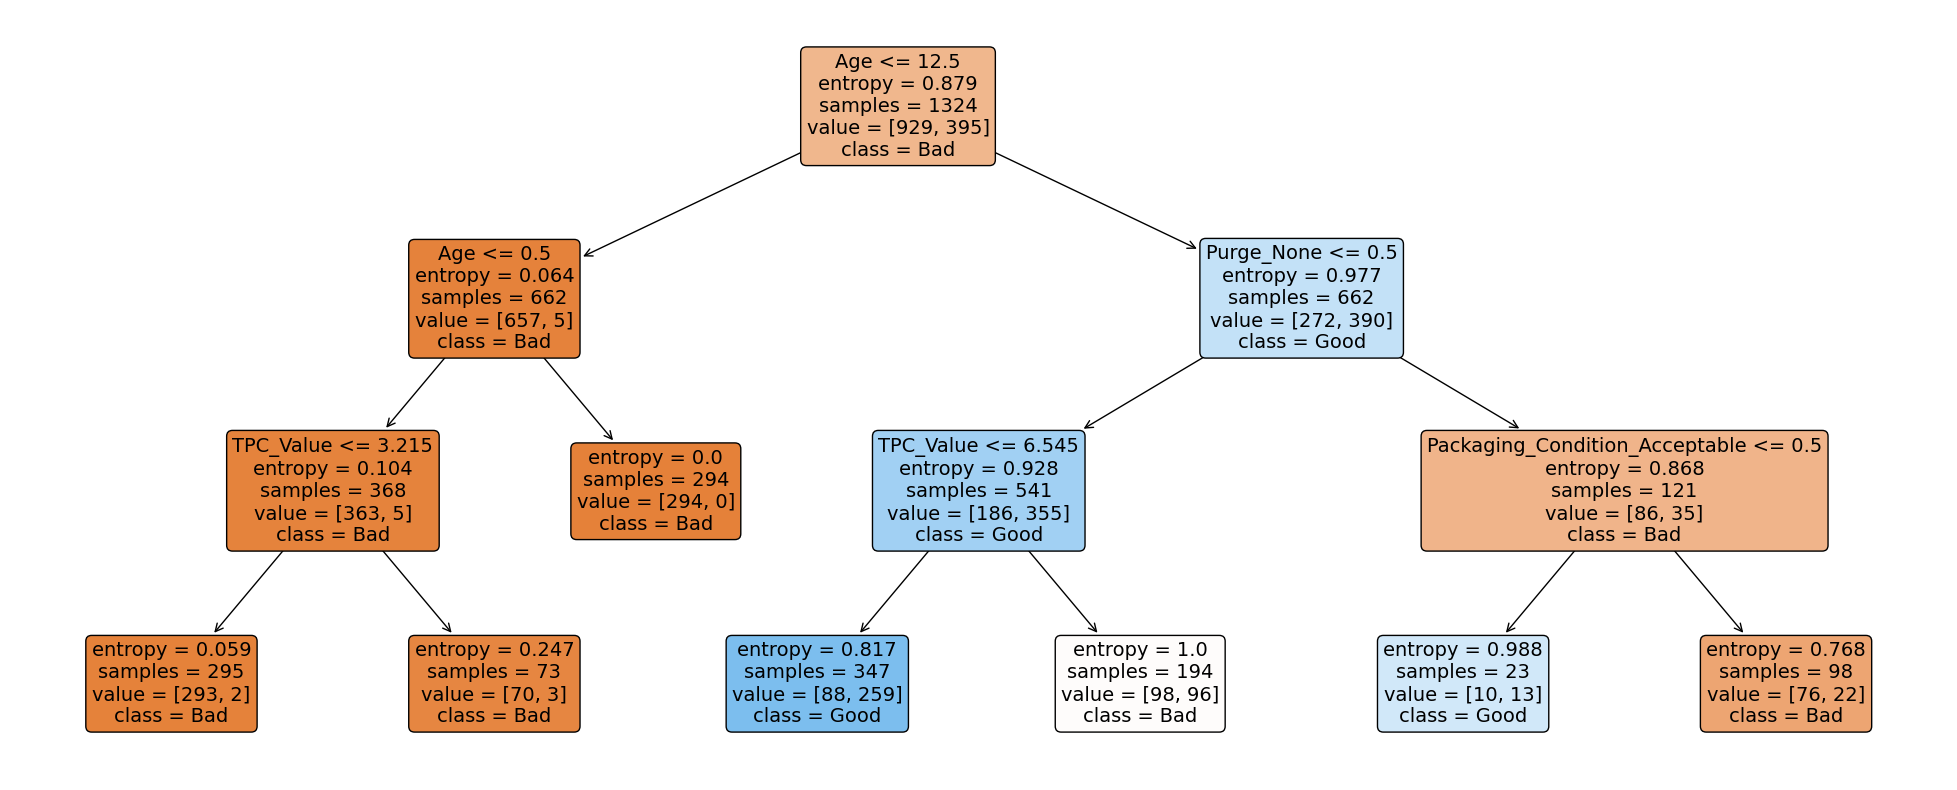

In [35]:
#step 4 Create a visualization of the Decision Tree for Bnls Loins

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

feature_names = X.columns[:8]
target_names = boneless_df['Product_Condition'].unique().tolist()

plt.figure(figsize=(25,10))
a = plot_tree(clf, 
              feature_names=feature_names, 
              class_names=target_names, 
              filled=True, 
              rounded=True, 
              fontsize=14)

In [36]:
#step 5 train / test / split for logistic regression

loin_df.drop(['Product_Condition_Good'], axis=1)

X = loin_df.drop('Product_Condition_Bad',axis=1)
Y = loin_df[['Product_Condition_Bad']]
x_trainloin, x_testloin, y_trainloin, y_testloin = train_test_split(X, Y, test_size = 0.2)

x_trainloin.shape, x_testloin.shape, y_trainloin.shape, y_testloin.shape

((1324, 10), (332, 10), (1324, 1), (332, 1))

In [37]:

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


In [38]:
knn = KNeighborsClassifier(n_neighbors=5, n_jobs=-1)
lr = LogisticRegression(max_iter=500, solver='libinear')
rfc = RandomForestClassifier()

pipe2 = Pipeline(steps=[
    ('standardizer', StandardScaler()),
    ('classifier', knn)
])

In [39]:

search_space3 = [{"classifier": [LogisticRegression(max_iter=500, solver='liblinear')],
                "classifier__penalty": ['l1', 'l2'],
                "classifier__C": np.logspace(0, 4, 10)},
               {"classifier": [RandomForestClassifier()],
               "classifier__n_estimators": [10, 100, 1000],
               "classifier__max_features": [1, 2, 3]},
               {"classifier__n_neighbors": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}]

In [40]:

grid_search2 = GridSearchCV(pipe2, search_space3, cv=5, verbose=0)

In [41]:
grid_search2.fit(x_trainloin, y_trainloin.values.ravel())

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardizer', StandardScaler()),
                                       ('classifier',
                                        KNeighborsClassifier(n_jobs=-1))]),
             param_grid=[{'classifier': [LogisticRegression(max_iter=500,
                                                            penalty='l1',
                                                            solver='liblinear')],
                          'classifier__C': array([1.00000000e+00, 2.78255940e+00, 7.74263683e+00, 2.15443469e+01,
       5.99484250e+01, 1.66810054e+02, 4.64158883e+02, 1.29154967e+03,
       3.59381366e+03, 1.00000000e+04]),
                          'classifier__penalty': ['l1', 'l2']},
                         {'classifier': [RandomForestClassifier()],
                          'classifier__max_features': [1, 2, 3],
                          'classifier__n_estimators': [10, 100, 1000]},
                         {'classifier__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10]}])

In [42]:
grid_search2.score(x_testloin, y_testloin)

1.0

In [43]:
grid_search2.best_params_

{'classifier': LogisticRegression(max_iter=500, penalty='l1', solver='liblinear'),
 'classifier__C': 1.0,
 'classifier__penalty': 'l1'}

In [44]:
grid_search2.best_estimator_

Pipeline(steps=[('standardizer', StandardScaler()),
                ('classifier',
                 LogisticRegression(max_iter=500, penalty='l1',
                                    solver='liblinear'))])

In [45]:
scalerloin = StandardScaler()

x_trainloin_scaled = scalerloin.fit_transform(x_trainloin)
x_testloin_scaled = scalerloin.transform(x_testloin)

In [46]:
log_reg_loin = LogisticRegression(random_state = 0).fit(x_trainloin_scaled, y_trainloin)

C:\Users\bonertzb\AppData\Local\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [47]:
print(log_reg_loin.coef_)
print(log_reg_loin.intercept_)

[[-0.62827765  0.52589856  0.18704389 -0.01676499  0.01676499  0.22197787
   0.29444831 -0.41436411  0.05827618 -4.56439742]]
[-3.07208726]


In [48]:
loin_log_pred = log_reg_loin.predict(x_testloin_scaled)
loin_log_pred

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,

In [49]:
log_reg_loin.score(x_trainloin_scaled, y_trainloin)

1.0

In [50]:
log_reg_loin.score(x_testloin_scaled, y_testloin)

1.0

In [51]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, log_loss

# Compute evaluation metrics
accuracy = accuracy_score(y_testloin, loin_log_pred)
precision = precision_score(y_testloin, loin_log_pred, average='weighted')
recall = recall_score(y_testloin, loin_log_pred, average='weighted')
f1 = f1_score(y_testloin, loin_log_pred, average='weighted')
logloss = log_loss(y_testloin, log_reg_loin.predict_proba(x_testloin))

# Print evaluation metrics
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 score:', f1)
print('Log Loss:', logloss)

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 score: 1.0
Log Loss: 2.951951720044339


C:\Users\bonertzb\AppData\Local\anaconda3\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


The output shows that the model performed perfectly on the bnls loin dataset, achieving perfect accuracy, precision, recall, and F1 score. The log loss value of 4.08 indicates that the model’s predicted probabilities were very close to the true probabilities.

In [52]:
from sklearn.metrics import classification_report

print(classification_report(y_testloin, loin_log_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       241
           1       1.00      1.00      1.00        91

    accuracy                           1.00       332
   macro avg       1.00      1.00      1.00       332
weighted avg       1.00      1.00      1.00       332



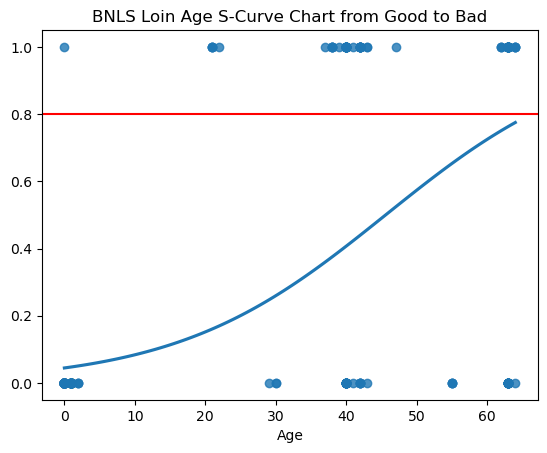

In [60]:
import seaborn as sns

default = loin_log_pred
age = x_testloin['Age']

sns.regplot(x=age, y=default, data=loin_df, logistic=True, ci=None)
plt.title("BNLS Loin Age S-Curve Chart from Good to Bad")
plt.axhline(y=0.8, color='r', linestyle='-')
plt.show()

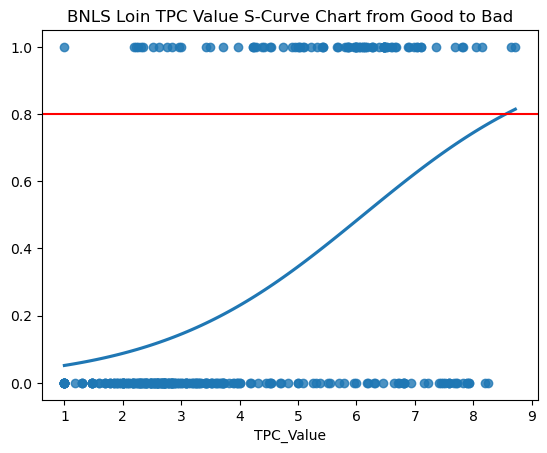

In [61]:
default_tpc = loin_log_pred
age_tpc = x_testloin['TPC_Value']

sns.regplot(x=age_tpc, y=default_tpc, data=loin_df, logistic=True, ci=None)
plt.title("BNLS Loin TPC Value S-Curve Chart from Good to Bad")
plt.axhline(y=0.8, color='r', linestyle='-')

In [63]:
pd.DataFrame(zip(x_trainloin.columns, np.transpose(log_reg_loin.coef_)), columns=['features', 'coef']) 

,features,coef
0,Location,[-0.6282776482951422]
1,Age,[0.5258985561423071]
2,TPC_Value,[0.18704389348854794]
3,Packaging_Condition_Acceptable,[-0.01676499085699012]
4,Packaging_Condition_Leaker,[0.01676499085699012]
5,Purge_Large,[0.22197787426194204]
6,Purge_Moderate,[0.29444831492423806]
7,Purge_None,[-0.4143641055060048]
8,Purge_Small,[0.05827618226165455]
9,Product_Condition_Good,[-4.564397421833418]


#### Working with the Bone in Backrib Dataframe

In [64]:
backrib_df.drop(['Product_Condition_Good'], axis=1)

Xr = backrib_df.drop('Product_Condition_Bad',axis=1)
Yr = backrib_df[['Product_Condition_Bad']]
x_trainrib, x_testrib, y_trainrib, y_testrib = train_test_split(Xr, Yr, test_size = 0.2)

x_trainrib.shape, x_testrib.shape, y_trainrib.shape, y_testrib.shape

((482, 10), (121, 10), (482, 1), (121, 1))

In [65]:
scaler = StandardScaler()

x_trainrib_scaled = scaler.fit_transform(x_trainrib)
x_testrib_scaled = scaler.transform(x_testrib)


In [66]:
x_trainrib_scaled

array([[-0.65238303,  2.59458192,  1.76624892, ...,  0.57575317,
        -0.46271567, -1.53968483],
       [-0.65238303,  2.65063447,  2.25668519, ..., -1.7368554 ,
         2.16115438, -1.53968483],
       [-0.04061529, -0.8806763 , -0.33562082, ...,  0.57575317,
        -0.46271567,  0.64948357],
       ...,
       [-1.26415078, -0.8806763 , -0.60652848, ...,  0.57575317,
        -0.46271567,  0.64948357],
       [ 1.79468795, -0.8806763 , -0.76533642, ...,  0.57575317,
        -0.46271567,  0.64948357],
       [-0.04061529,  0.80090026,  0.87879281, ..., -1.7368554 ,
        -0.46271567, -1.53968483]])

In [67]:
x_testrib_scaled

array([[-0.04061529, -0.8806763 , -0.69060327, ...,  0.57575317,
        -0.46271567,  0.64948357],
       [-0.04061529, -0.8806763 , -0.98953586, ...,  0.57575317,
        -0.46271567,  0.64948357],
       [-0.04061529,  0.80090026, -0.09740892, ..., -1.7368554 ,
        -0.46271567, -1.53968483],
       ...,
       [-0.65238303,  2.65063447,  1.99979   , ..., -1.7368554 ,
         2.16115438, -1.53968483],
       [-1.26415078,  0.74484771, -0.4383789 , ..., -1.7368554 ,
         2.16115438,  0.64948357],
       [ 1.79468795,  0.74484771,  1.21509196, ..., -1.7368554 ,
        -0.46271567, -1.53968483]])

In [68]:
log_reg_rib = LogisticRegression(random_state = 0).fit(x_trainrib_scaled, y_trainrib)

C:\Users\bonertzb\AppData\Local\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [69]:
print(log_reg_rib.coef_)
print(log_reg_rib.intercept_)

[[-0.11337756  0.57704051  0.38640093 -0.06297073  0.06297073  0.13784979
   0.10052854 -0.2125719   0.12577179 -3.84438122]]
[-2.64528524]


In [70]:
rib_log_pred = log_reg_rib.predict(x_testrib_scaled)
rib_log_pred

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1], dtype=uint8)

In [71]:
log_reg_rib.score(x_trainrib_scaled, y_trainrib)

1.0

In [72]:
log_reg_rib.score(x_testrib_scaled, y_testrib)

1.0

In [79]:
# Compute evaluation metrics
rib_accuracy = accuracy_score(y_testrib, rib_log_pred)
rib_precision = precision_score(y_testrib, rib_log_pred, average='weighted')
rib_recall = recall_score(y_testrib, rib_log_pred, average='weighted')
rib_f1 = f1_score(y_testrib, rib_log_pred, average='weighted')
rib_logloss = log_loss(y_testrib, log_reg_rib.predict_proba(x_testrib))

# Print evaluation metrics
print('Accuracy:', rib_accuracy)
print('Precision:', rib_precision)
print('Recall:', rib_recall)
print('F1 score:', rib_f1)
print('Log Loss:', rib_logloss)

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 score: 1.0
Log Loss: 2.694050936666053


C:\Users\bonertzb\AppData\Local\anaconda3\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [73]:
print(classification_report(y_testrib, rib_log_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        92
           1       1.00      1.00      1.00        29

    accuracy                           1.00       121
   macro avg       1.00      1.00      1.00       121
weighted avg       1.00      1.00      1.00       121



In [74]:
rib_log_prob = log_reg_rib.predict_proba(x_testrib)[:, 1]

C:\Users\bonertzb\AppData\Local\anaconda3\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


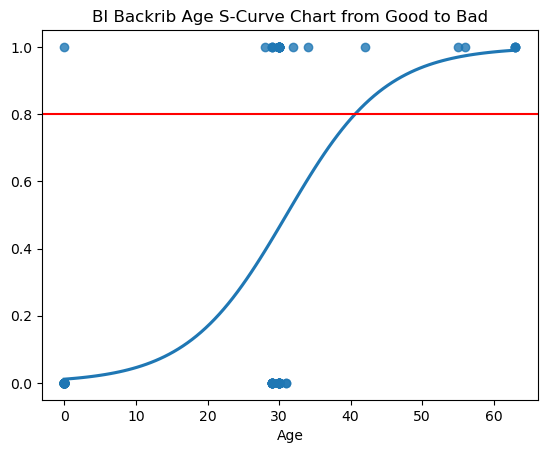

In [75]:
default_rib = rib_log_pred
age_rib = x_testrib['Age']

sns.regplot(x=age_rib, y=default_rib, data=backrib_df, logistic=True, ci=None)
plt.title("BI Backrib Age S-Curve Chart from Good to Bad")
plt.axhline(y=0.8, color='r', linestyle='-')

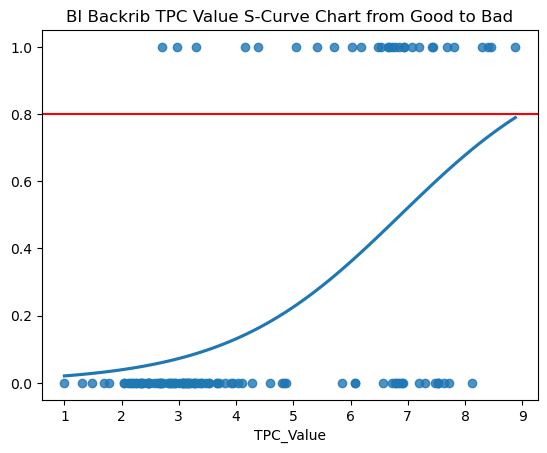

In [76]:
default_rib_tpc = rib_log_pred
age_rib_tpc = x_testrib['TPC_Value']

sns.regplot(x=age_rib_tpc, y=default_rib_tpc, data=backrib_df, logistic=True, ci=None)
plt.title("BI Backrib TPC Value S-Curve Chart from Good to Bad")
plt.axhline(y=0.8, color='r', linestyle='-')

In [77]:
pd.DataFrame(zip(x_trainrib.columns, np.transpose(log_reg_rib.coef_)), columns=['features', 'coef']) 

,features,coef
0,Location,[-0.11337756181000504]
1,Age,[0.5770405088456046]
2,TPC_Value,[0.386400932869553]
3,Packaging_Condition_Acceptable,[-0.0629707316423809]
4,Packaging_Condition_Leaker,[0.06297073164238093]
5,Purge_Large,[0.1378497907303996]
6,Purge_Moderate,[0.10052853529829142]
7,Purge_None,[-0.21257190174485302]
8,Purge_Small,[0.12577179206104966]
9,Product_Condition_Good,[-3.844381224304452]
